# Classification
## Import and Explore the data from Kaggle



In [1]:
import pandas as pd

In [8]:
diabetes = pd.read_csv(r'Data/diabetes.csv')

In [9]:
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
features = list(diabetes.columns[:-1])
label = diabetes.columns[-1]

X = diabetes.iloc[:,:-1].values
y = diabetes.iloc[:,-1].values

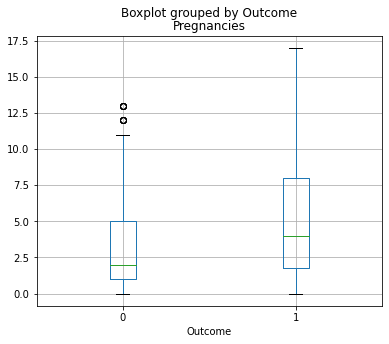

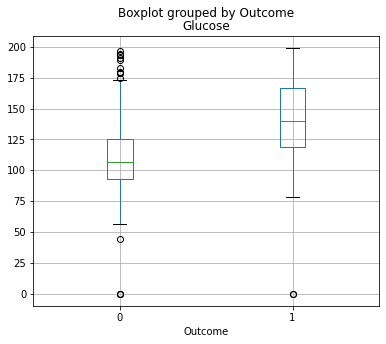

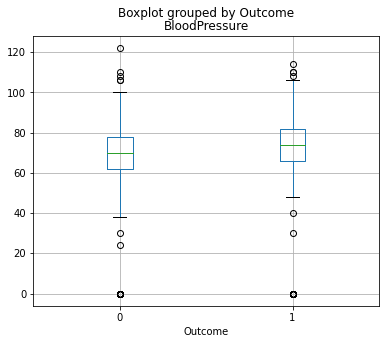

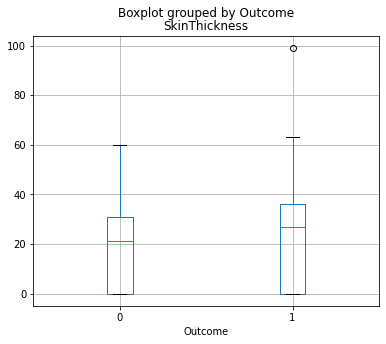

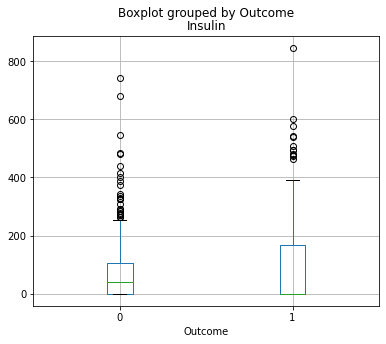

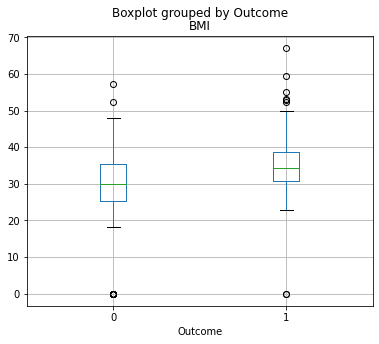

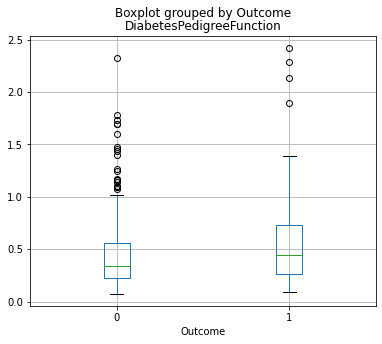

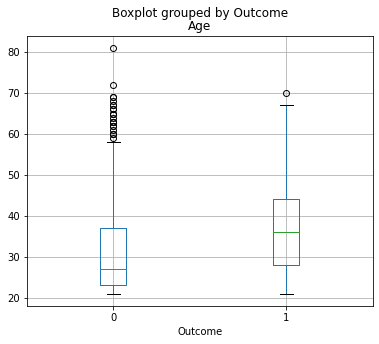

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

for column_name in features:
    fig, ax = plt.subplots(figsize=(6,5))
    diabetes.boxplot(column=column_name, by=label, ax=ax)
    plt.title(column_name)
plt.show()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

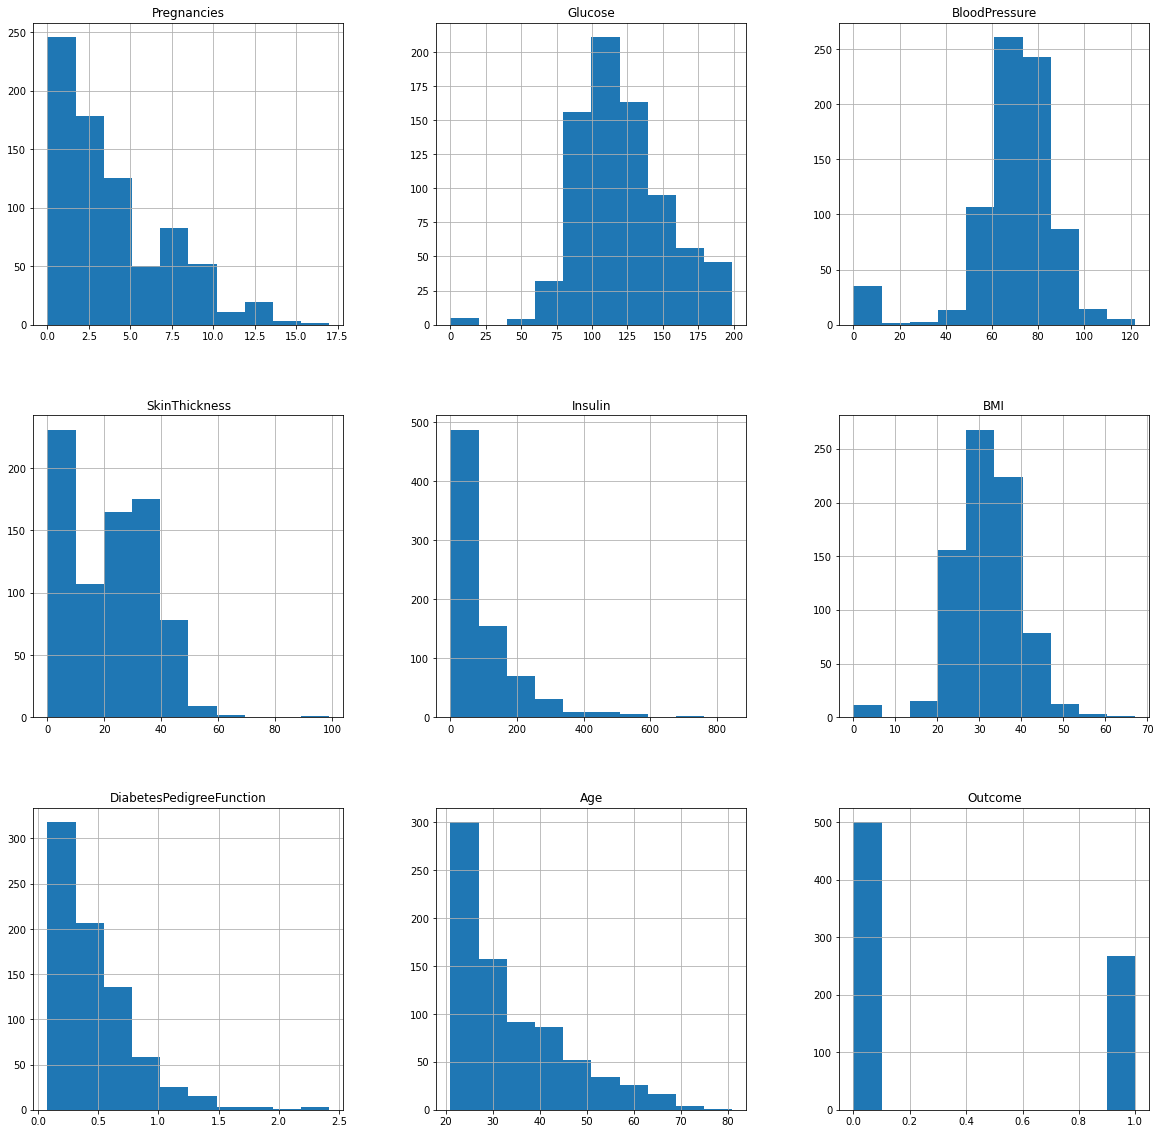

In [74]:
diabetes.hist(figsize=(20,20))

<AxesSubplot:>

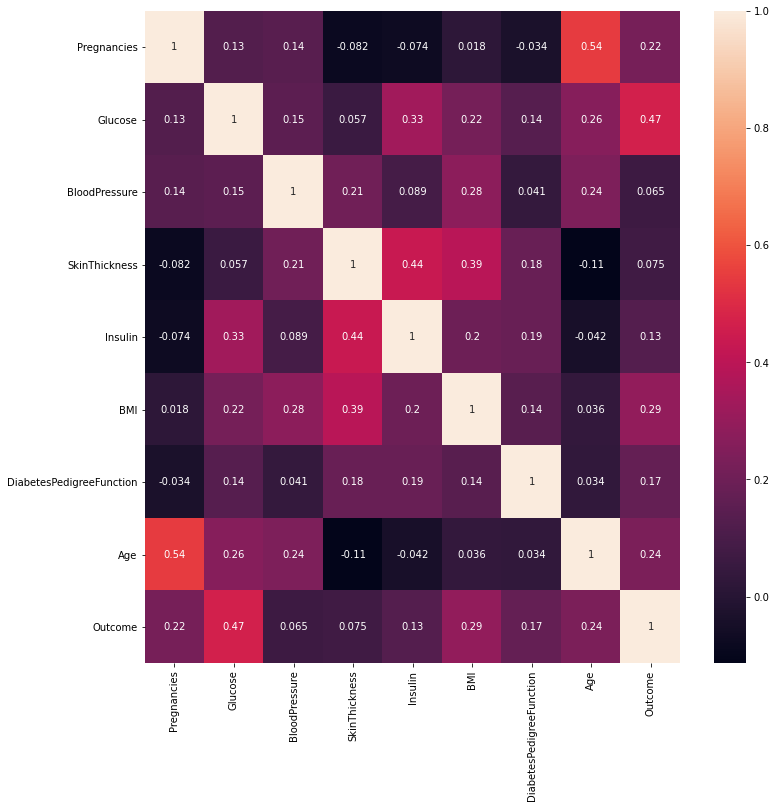

In [55]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(data=diabetes.corr(), annot=True)

## Split data

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train and Evaluate a Binary Classification Model

In [63]:
from sklearn.linear_model import LogisticRegression

reg = 0.01
logistic_regression = LogisticRegression(C=1/reg, solver='liblinear').fit(X_train,y_train)
print(logistic_regression)

LogisticRegression(C=100.0, solver='liblinear')


In [66]:
predictions = logistic_regression.predict(X_test)
print('Predicted labels: ', predictions[:10])
print('Actual labels:    ', y_test[:10])

Predicted labels:  [0 0 0 0 1 0 0 1 1 1]
Actual labels:     [0 0 0 0 0 0 0 0 0 0]


In [68]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.7359307359307359
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



**Precision -** <br>
$precision = \frac{TP}{(TP+FP)}$

**Recall -** <br>
$recall (sensitivity) = \frac{TP}{(TP+FN)}$

**F-score -** <br>
$F_Bscore = \frac{(1+{B}^2)*TP}{(1+{B}^2)*TP + {B}^2*FN + FP}$

**F1-score -** <br>
$F_1score = 2*\frac{precision*recall}{precision+recall} = \frac{TP}{TP+\frac{1}{2}(FP+FN)}$